In [1]:
#Importing Libraries
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
import seaborn as sns

#reading Dataset
retail = pd.read_csv("data/Unsupervised learning/OnlineRetail.csv",  sep = ',',encoding = "ISO-8859-1", header= 0)
# parse date
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'], format = "%d-%m-%Y %H:%M")

retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [7]:
#dropping the na cells
order_wise = retail.dropna()
order_wise.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [8]:
#RFM implementation
amount  = pd.DataFrame(order_wise.Quantity * order_wise.UnitPrice, columns = ["Amount"])

#merging amount in order_wise
order_wise = pd.concat(objs = [order_wise, amount], axis = 1, ignore_index = False)

In [10]:
order_wise.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [11]:
#Monetary Function
monetary = order_wise.groupby("CustomerID").Amount.sum()
monetary = monetary.reset_index()


In [12]:
monetary.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [13]:
#Frequency function
frequency = order_wise[['CustomerID', 'InvoiceNo']].groupby("CustomerID").InvoiceNo.count()
frequency = frequency.reset_index()
frequency.columns = ["CustomerID", "Frequency"]

frequency.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4367,18280.0,10
4368,18281.0,7
4369,18282.0,13
4370,18283.0,756


In [15]:
#creating master dataset

master = monetary.merge(frequency, on = "CustomerID", how = "inner")

In [16]:
master.head()

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [40]:
#Generating recency function
recency  = order_wise[['CustomerID','InvoiceDate']]
maximum = max(recency.InvoiceDate)

print(maximum)
recency.head(20)

2011-12-09 12:50:00


,CustomerID,InvoiceDate
0,17850.0,2010-12-01 08:26:00
1,17850.0,2010-12-01 08:26:00
2,17850.0,2010-12-01 08:26:00
3,17850.0,2010-12-01 08:26:00
4,17850.0,2010-12-01 08:26:00
5,17850.0,2010-12-01 08:26:00
6,17850.0,2010-12-01 08:26:00
7,17850.0,2010-12-01 08:28:00
8,17850.0,2010-12-01 08:28:00
9,13047.0,2010-12-01 08:34:00


In [41]:
maximum = maximum + pd.DateOffset(days=1)
recency['rec'] = maximum - recency.InvoiceDate

recency

C:\Users\Ashwini\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,CustomerID,InvoiceDate,rec
0,17850.0,2010-12-01 08:26:00,374 days 04:24:00
1,17850.0,2010-12-01 08:26:00,374 days 04:24:00
2,17850.0,2010-12-01 08:26:00,374 days 04:24:00
3,17850.0,2010-12-01 08:26:00,374 days 04:24:00
4,17850.0,2010-12-01 08:26:00,374 days 04:24:00
...,...,...,...
541904,12680.0,2011-12-09 12:50:00,1 days 00:00:00
541905,12680.0,2011-12-09 12:50:00,1 days 00:00:00
541906,12680.0,2011-12-09 12:50:00,1 days 00:00:00
541907,12680.0,2011-12-09 12:50:00,1 days 00:00:00


In [42]:
recency.rec

0        374 days 04:24:00
1        374 days 04:24:00
2        374 days 04:24:00
3        374 days 04:24:00
4        374 days 04:24:00
                ...       
541904     1 days 00:00:00
541905     1 days 00:00:00
541906     1 days 00:00:00
541907     1 days 00:00:00
541908     1 days 00:00:00
Name: rec, Length: 406829, dtype: timedelta64[ns]

In [44]:

#Dataframe merging by recency
df = pd.DataFrame(recency.groupby('CustomerID').rec.min())
df = df.reset_index()
df.columns = ["CustomerID", "Recency"]

df.head(20)

,CustomerID,Recency
0,12346.0,326 days 02:33:00
1,12347.0,2 days 20:58:00
2,12348.0,75 days 23:37:00
3,12349.0,19 days 02:59:00
4,12350.0,310 days 20:49:00
5,12352.0,36 days 22:13:00
6,12353.0,204 days 19:03:00
7,12354.0,232 days 23:39:00
8,12355.0,214 days 23:01:00
9,12356.0,23 days 04:10:00


In [45]:
#Combining all recency, frequency and monetary parameters
RFM = master.merge(df, on = "CustomerID")

In [46]:
RFM.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,326 days 02:33:00
1,12347.0,4310.00,182,2 days 20:58:00
2,12348.0,1797.24,31,75 days 23:37:00
3,12349.0,1757.55,73,19 days 02:59:00
4,12350.0,334.40,17,310 days 20:49:00


525.9499999999995


{'whiskers': [<matplotlib.lines.Line2D at 0x1915bd16ec8>,
 'caps': [<matplotlib.lines.Line2D at 0x1915bd19f08>,
 'boxes': [<matplotlib.lines.Line2D at 0x1915bd16648>],
 'medians': [<matplotlib.lines.Line2D at 0x1915bd1efc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1915bd1ef48>],
 'means': []}

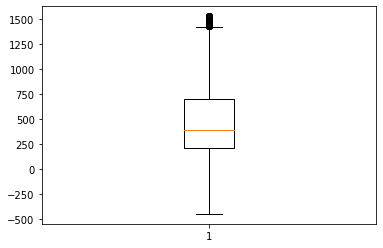

In [55]:
# outlier treatment for Amount
#plt.boxplot(RFM.Amount)
Q1 = RFM.Amount.quantile(0.25)
Q3 = RFM.Amount.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
RFM = RFM[(RFM.Amount >= Q1 - 1.5*IQR) & (RFM.Amount <= Q3 + 1.5*IQR)]
plt.boxplot(RFM.Amount)

{'whiskers': [<matplotlib.lines.Line2D at 0x1915bcb6a08>,
 'caps': [<matplotlib.lines.Line2D at 0x1915bcb99c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1915bcb2e88>],
 'medians': [<matplotlib.lines.Line2D at 0x1915bcbd948>],
 'fliers': [<matplotlib.lines.Line2D at 0x1915bcbdf88>],
 'means': []}

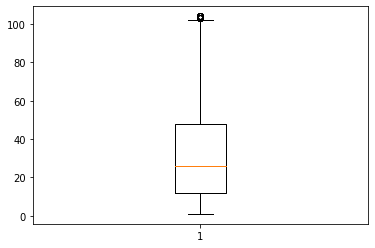

In [54]:

# outlier treatment for Frequency
plt.boxplot(RFM.Frequency)
Q1 = RFM.Frequency.quantile(0.25)
Q3 = RFM.Frequency.quantile(0.75)
IQR = Q3 - Q1
RFM = RFM[(RFM.Frequency >= Q1 - 1.5*IQR) & (RFM.Frequency <= Q3 + 1.5*IQR)]
#plt.boxplot(RFM.Frequency)

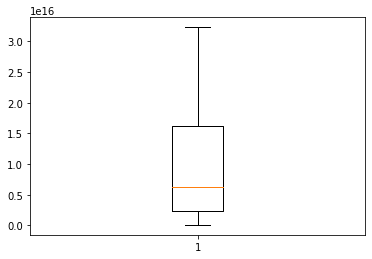

In [52]:

# outlier treatment for Recency
plt.boxplot(RFM.Recency)
Q1 = RFM.Recency.quantile(0.25)
Q3 = RFM.Recency.quantile(0.75)
IQR = Q3 - Q1
RFM = RFM[(RFM.Recency >= Q1 - 1.5*IQR) & (RFM.Recency <= Q3 + 1.5*IQR)]

In [58]:
RFM_norms1= RFM.drop('CustomerID',axis=1)
RFM_norms1.Recency=RFM_norms1.Recency.dt.days

from sklearn.preprocessing import StandardScaler

standard_scaler =StandardScaler()

standard_scaler.fit_transform(RFM_norms1)

RFM_norms1.head()



,Amount,Frequency,Recency
0,0.0,2,326
4,334.4,17,310
6,89.0,4,204
7,1079.4,58,232
8,459.4,13,214


In [59]:
km_5 = KMeans(n_clusters=5)

km_5.fit(RFM_norms1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [60]:
from sklearn.metrics import silhouette_score

sse_ = []

for k in range(2,15) :
    km= KMeans(n_clusters=k).fit(RFM_norms1)
    sse_.append([k,silhouette_score(RFM_norms1,km.labels_)]) 

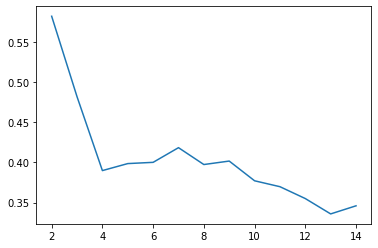

In [61]:
plt.plot(pd.DataFrame(sse_)[0],pd.DataFrame(sse_)[1])

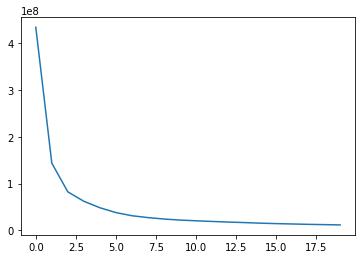

In [64]:
ssd = []

for k in range(1,21):
    km= KMeans(n_clusters=k).fit(RFM_norms1)
    ssd.append(km.inertia_) 
    
plt.plot(ssd)

In [67]:
from kmodes.kmodes import KModes

bank = pd.read_csv("data/Unsupervised learning/bankmarketing.csv")

bank_cust = bank[['age','job', 'marital', 'education', 'default', 'housing', 'loan','contact','month','day_of_week','poutcome']]

bank_cust['age_bin'] = pd.cut(bank_cust['age'], [0, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                              labels=['0-20', '20-30', '30-40', '40-50','50-60','60-70','70-80', '80-90','90-100'])

bank_cust.head()

C:\Users\Ashwini\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,50-60
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,50-60
2,37,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,30-40
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,30-40
4,56,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,50-60


In [68]:

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
bank_cust = bank_cust.apply(le.fit_transform)

In [69]:
bank_cust.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin
0,39,3,1,0,0,0,0,1,6,1,1,4
1,40,7,1,3,1,0,0,1,6,1,1,4
2,20,7,1,3,0,2,0,1,6,1,1,2
3,23,0,1,1,0,0,0,1,6,1,1,2
4,39,7,1,3,0,0,2,1,6,1,1,4


In [71]:
md = KModes(n_clusters=2, init='cao', n_init=1,verbose =1)

prc= md.fit_predict(bank_cust)

prc

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5191, cost: 231253.0
Run 1, iteration: 2/100, moves: 960, cost: 231253.0


array([1, 1, 0, ..., 0, 1, 0], dtype=uint16)